In [61]:
! pip install xgboost
from imblearn.over_sampling import SMOTE, ADASYN
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fastai.tabular.all import df_shrink
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV
from sklearn.utils.validation import check_is_fitted
from sklearn.pipeline import make_pipeline
import pickle
from xgboost import XGBClassifier
from sklearn.decomposition import PCA

In [62]:
df = pd.read_csv('/content/TON_IOT_pre.unknown')
df.head()

,L4_SRC_PORT,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label,Attack,IPV4_SRC_ADDR_0,IPV4_SRC_ADDR_1,IPV4_SRC_ADDR_2,IPV4_SRC_ADDR_3,IPV4_DST_ADDR_0,IPV4_DST_ADDR_1,IPV4_DST_ADDR_2,IPV4_DST_ADDR_3
0,63318,443,6,91.00,181,165,2,1,24,327,0,Benign,192,168,1,195,52,139,250,253
1,57442,15600,17,0.00,63,0,1,0,0,0,0,Benign,192,168,1,79,192,168,1,255
2,57452,15600,17,0.00,63,0,1,0,0,0,0,Benign,192,168,1,79,239,255,255,250
3,51989,15600,17,0.00,63,0,1,0,0,0,0,Benign,192,168,1,79,192,168,1,255
4,53927,1900,17,153.12,459,0,3,0,0,614,0,Benign,192,168,1,6,239,255,255,250


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1210789 entries, 0 to 1210788
Data columns (total 20 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   L4_SRC_PORT                 1210789 non-null  int64  
 1   L4_DST_PORT                 1210789 non-null  int64  
 2   PROTOCOL                    1210789 non-null  int64  
 3   L7_PROTO                    1210789 non-null  float64
 4   IN_BYTES                    1210789 non-null  int64  
 5   OUT_BYTES                   1210789 non-null  int64  
 6   IN_PKTS                     1210789 non-null  int64  
 7   OUT_PKTS                    1210789 non-null  int64  
 8   TCP_FLAGS                   1210789 non-null  int64  
 9   FLOW_DURATION_MILLISECONDS  1210789 non-null  int64  
 10  Label                       1210789 non-null  int64  
 11  Attack                      1210789 non-null  object 
 12  IPV4_SRC_ADDR_0             1210789 non-null  int64  
 1

In [64]:
df = df[df['Attack']!="Benign"]

In [65]:
df = df_shrink(df, obj2cat=False, int2uint=False)

In [66]:
df.dropna(inplace=True)

In [67]:
df.isnull().sum()

L4_SRC_PORT                   0
L4_DST_PORT                   0
PROTOCOL                      0
L7_PROTO                      0
IN_BYTES                      0
OUT_BYTES                     0
IN_PKTS                       0
OUT_PKTS                      0
TCP_FLAGS                     0
FLOW_DURATION_MILLISECONDS    0
Label                         0
Attack                        0
IPV4_SRC_ADDR_0               0
IPV4_SRC_ADDR_1               0
IPV4_SRC_ADDR_2               0
IPV4_SRC_ADDR_3               0
IPV4_DST_ADDR_0               0
IPV4_DST_ADDR_1               0
IPV4_DST_ADDR_2               0
IPV4_DST_ADDR_3               0
dtype: int64

In [68]:
X = df.drop(columns='Attack')
y = df['Attack']

In [69]:
from imblearn.over_sampling import SMOTE

In [70]:
oversample = SMOTE()

In [71]:
X, y = oversample.fit_resample(X, y)

In [72]:
print(X.shape)
print(y.shape)

(4179987, 19)
(4179987,)


In [73]:
import pickle
with open('SMOT-multi.pkl', 'wb') as f:
    pickle.dump(oversample, f)

In [74]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


In [75]:
pca = PCA(n_components = 10)
x10D = pca.fit_transform(X)
x10D = pd.DataFrame(x10D)
x10D.head(1)

,0,1,2,3,4,5,6,7,8,9
0,-938.914428,-3453.801804,-13092.209559,2200.431871,1364.280575,105.334768,-26.062891,12.10792,37.546077,0.667339


In [76]:
pca.components_.T[:,0]

array([ 1.92049726e-01,  3.24914134e-02, -5.25484250e-05,  6.27608099e-04,
        5.44310746e-02,  1.27013998e-01,  7.89778189e-04,  4.57524867e-04,
        7.46926387e-05,  9.71061956e-01, -0.00000000e+00, -1.10740935e-09,
        4.12970136e-10, -8.54503115e-09,  1.04086385e-03, -5.86800453e-04,
       -5.23506474e-04,  6.16068465e-04, -1.12845947e-03])


these are the first principle component contents

In [77]:
 pca.explained_variance_ratio_

array([4.06797674e-01, 2.62215911e-01, 2.05649712e-01, 1.15121989e-01,
       1.01716675e-02, 1.78877444e-05, 1.24701432e-05, 6.21686587e-06,
       2.83606566e-06, 1.48065665e-06])

In [78]:
pca = PCA(n_components = 10)
x10D = pca.fit_transform(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
cumsum

array([0.40679767, 0.66901359, 0.8746633 , 0.98978529, 0.99995695,
       0.99997484, 0.99998731, 0.99999353, 0.99999637, 0.99999785])

Every attribute gave us the enough varianve that we need to start our model , so It will be enough to choose only those 10 principle components to represent the rest of the dataset

In [79]:
cumsum = np.cumsum(pca.explained_variance_ratio_)

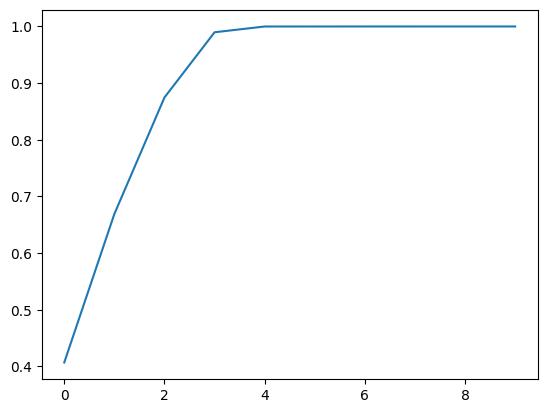

In [80]:
plt.plot(cumsum)

An elbow methods one of the techniques that could prove my prespective

In [81]:
pca = PCA(n_components = 6)
x10D = pca.fit_transform(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
cumsum

array([0.40679767, 0.66901359, 0.8746633 , 0.98978529, 0.99995695,
       0.99997484])

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 998115 entries, 8 to 1210788
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   L4_SRC_PORT                 998115 non-null  int32  
 1   L4_DST_PORT                 998115 non-null  int32  
 2   PROTOCOL                    998115 non-null  int8   
 3   L7_PROTO                    998115 non-null  float32
 4   IN_BYTES                    998115 non-null  int32  
 5   OUT_BYTES                   998115 non-null  int32  
 6   IN_PKTS                     998115 non-null  int16  
 7   OUT_PKTS                    998115 non-null  int16  
 8   TCP_FLAGS                   998115 non-null  int8   
 9   FLOW_DURATION_MILLISECONDS  998115 non-null  int32  
 10  Label                       998115 non-null  int8   
 11  Attack                      998115 non-null  object 
 12  IPV4_SRC_ADDR_0             998115 non-null  int16  
 13  IPV4_SRC_ADDR

In [83]:
import pickle
with open('PCA-SMOT-multi.pkl', 'wb') as f:
    pickle.dump(oversample, f)

# Logistic Regression

In [84]:
X_train, X_test, Y_train, Y_test = train_test_split(x10D, y, test_size = 0.3, random_state = 0)

In [85]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)
test_predictions = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [86]:
model.intercept_

array([ 3.76605509e-06,  2.67091790e-05, -2.63115663e-05,  7.58733692e-07,
        2.82149863e-05, -3.78428162e-06, -1.46449440e-05, -9.83718465e-06,
       -4.87097756e-06])

In [87]:
model.coef_

array([[ 5.04441494e-04,  2.28058409e-04, -6.25359549e-04,
         6.48115492e-04, -5.86687321e-03,  4.98963145e-03],
       [-5.29037478e-06, -6.28696605e-04,  2.23425381e-04,
         6.85782649e-05,  1.01164446e-03, -6.35957363e-03],
       [-3.62150663e-05, -5.88080478e-04, -2.44809081e-04,
        -1.07727622e-03, -1.65791354e-03,  1.25933213e-02],
       [ 1.39216787e-06,  3.86439879e-04,  1.60821046e-04,
        -1.38519267e-04,  3.05131942e-03, -2.86651846e-03],
       [ 1.86227391e-04,  3.67470828e-04,  1.21523583e-04,
        -4.09363162e-05,  1.59261892e-03,  9.99404116e-03],
       [-3.49163364e-05,  3.37774907e-04,  3.17433872e-04,
         3.44139955e-04,  3.77883735e-03, -6.62736803e-03],
       [-6.62543032e-04, -2.74916051e-04, -1.33001180e-04,
         1.07293284e-03, -6.45907656e-03, -2.90416712e-03],
       [ 6.99798635e-05, -2.10334377e-04, -6.89214737e-05,
        -1.03703111e-03,  1.04908787e-03, -4.51281151e-03],
       [-2.30761068e-05,  3.82283486e-04,  2.488

In [88]:
preds = model.predict(X_test)

In [89]:
print(classification_report(Y_test,preds))

              precision    recall  f1-score   support

           0       0.81      0.72      0.76    139309
           1       0.28      0.32      0.30    139525
           2       0.53      1.00      0.69    139568
           3       0.31      0.31      0.31    138815
           4       0.33      0.18      0.23    139760
           5       0.31      0.62      0.41    139478
           6       0.81      0.99      0.89    139371
           7       0.53      0.13      0.21    139145
           8       0.28      0.01      0.02    139026

    accuracy                           0.48   1253997
   macro avg       0.46      0.48      0.43   1253997
weighted avg       0.46      0.48      0.43   1253997



In [90]:
import pickle
with open('Regression-pca-SMOTE-multi.pkl', 'wb') as f:
    pickle.dump(oversample, f)

#RandomForestClassifier

In [91]:
from sklearn.ensemble import RandomForestClassifier

In [92]:
model = RandomForestClassifier(n_estimators=10,max_features='auto',random_state=101)

In [93]:
model.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_features='auto', n_estimators=10, random_state=101)

In [94]:
preds = model.predict(X_test)

In [95]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [96]:
print(classification_report(Y_test,preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    139309
           1       0.67      0.61      0.64    139525
           2       0.87      0.93      0.90    139568
           3       0.42      0.40      0.41    138815
           4       0.98      0.99      0.99    139760
           5       0.53      0.52      0.52    139478
           6       1.00      1.00      1.00    139371
           7       0.83      0.86      0.85    139145
           8       0.73      0.75      0.74    139026

    accuracy                           0.79   1253997
   macro avg       0.78      0.79      0.78   1253997
weighted avg       0.78      0.79      0.78   1253997



In [97]:
import pickle
with open('Random-pca-SMOTE-multi.pkl', 'wb') as f:
    pickle.dump(oversample, f)

In [60]:
decoded_labels = label_encoder.inverse_transform(Y_test)

#Catgboost

In [99]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 11.7 MB/s eta 0:00:00


In [103]:
import catboost as ctb
model =  ctb.CatBoostClassifier()
model.fit(X_train, Y_train)

Learning rate set to 0.118878
0:	learn: 1.8838117	total: 2.83s	remaining: 47m 2s
1:	learn: 1.7290062	total: 7.02s	remaining: 58m 21s
2:	learn: 1.6143808	total: 9.85s	remaining: 54m 33s
3:	learn: 1.5332244	total: 12.4s	remaining: 51m 29s
4:	learn: 1.4646742	total: 15.3s	remaining: 50m 44s
5:	learn: 1.4026087	total: 19.3s	remaining: 53m 24s
6:	learn: 1.3494663	total: 22.2s	remaining: 52m 25s
7:	learn: 1.3038369	total: 25s	remaining: 51m 37s
8:	learn: 1.2682527	total: 27.6s	remaining: 50m 40s
9:	learn: 1.2381633	total: 30.9s	remaining: 50m 58s
10:	learn: 1.2134482	total: 34.2s	remaining: 51m 10s
11:	learn: 1.1885372	total: 37.1s	remaining: 50m 50s
12:	learn: 1.1635949	total: 39.8s	remaining: 50m 24s
13:	learn: 1.1416981	total: 43s	remaining: 50m 29s
14:	learn: 1.1237312	total: 46.6s	remaining: 50m 57s
15:	learn: 1.1087280	total: 49.5s	remaining: 50m 42s
16:	learn: 1.0921201	total: 52.3s	remaining: 50m 26s
17:	learn: 1.0797296	total: 55.1s	remaining: 50m 3s
18:	learn: 1.0663734	total: 59.2

In [105]:
y_pred= model.predict(X_test)
score = accuracy_score(Y_test, y_pred)
print("Accuracy:", score)
print(classification_report(Y_test,y_pred))

Accuracy: 0.7513917497410281
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    139309
           1       0.86      0.52      0.65    139525
           2       0.75      0.97      0.84    139568
           3       0.76      0.34      0.47    138815
           4       0.95      0.92      0.93    139760
           5       0.47      0.59      0.52    139478
           6       0.99      1.00      1.00    139371
           7       0.67      0.70      0.68    139145
           8       0.54      0.74      0.62    139026

    accuracy                           0.75   1253997
   macro avg       0.78      0.75      0.75   1253997
weighted avg       0.78      0.75      0.75   1253997



In [106]:
import pickle
with open('Catboost-pca-SMOTE-multi.pkl', 'wb') as f:
    pickle.dump(oversample, f)